In [1]:

from glob import glob
import csv
import os

# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statistics

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [2]:
general_path = 'D:/Music Genre/DATA/'

data = pd.read_csv(f'{general_path}/genere_features_3secwithth.csv')
data = data.iloc[0:, 1:] 
data.shape

(11500, 54)

In [3]:
y = data['genre'] # genre variable.
X = data.loc[:, data.columns != 'genre'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    

In [6]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Accuracy Naive Bayes : 0.48609 

Accuracy Stochastic Gradient Descent : 0.6 

Accuracy KNN : 0.80913 

Accuracy Random Forest : 0.74478 

Accuracy Support Vector Machine : 0.72609 



In [7]:
datatest = pd.read_csv(f'{general_path}/genere_features3sec_thai.csv')
datatest  = datatest .iloc[0:, 1:] 
datatest.shape

(2000, 54)

In [8]:
y2 = datatest['genre'] # genre variable.
X2=datatest.loc[:, datatest.columns != 'genre'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X2.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X2)

# new data frame with the new scaled data. 
X2 = pd.DataFrame(np_scaled, columns = cols)

In [9]:
X_train2, X_test, y_train2, y_test = train_test_split(X2, y2, random_state=42)

In [10]:
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Accuracy Naive Bayes : 0.322 

Accuracy Stochastic Gradient Descent : 0.406 

Accuracy KNN : 0.426 

Accuracy Random Forest : 0.37 

Accuracy Support Vector Machine : 0.372 



In [11]:
model2 =  KNeighborsClassifier(n_neighbors=19)
model2.fit(X_train, y_train)
predicted = model2.predict(X_train)
predicted 

array(['rock', 'reggae', 'disco', ..., 'jazz', 'blues', 'pop'],
      dtype=object)

In [22]:
bluepred = pd.DataFrame(model2.predict( X2.loc[:199])).value_counts()
print(bluepred)
print(y2.loc[:199])

blues        63
hiphop       49
reggae       31
metal        23
country      15
classical     8
disco         4
jazz          4
rock          3
dtype: int64
0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
195    blues
196    blues
197    blues
198    blues
199    blues
Name: genre, Length: 200, dtype: object


In [23]:
classicalpred = pd.DataFrame(model2.predict( X2.loc[200:399])).value_counts()
print(classicalpred )
print(y2.loc[200:399])

classical    176
jazz          21
hiphop         2
disco          1
dtype: int64
200    classical
201    classical
202    classical
203    classical
204    classical
         ...    
395    classical
396    classical
397    classical
398    classical
399    classical
Name: genre, Length: 200, dtype: object


In [24]:
countrypred= pd.DataFrame(model2.predict( X2.loc[400:599])).value_counts()
print(countrypred)
print(y2.loc[400:599])

reggae       65
country      42
disco        30
hiphop       29
blues        10
metal        10
classical     7
jazz          5
rock          2
dtype: int64
400    country
401    country
402    country
403    country
404    country
        ...   
595    country
596    country
597    country
598    country
599    country
Name: genre, Length: 200, dtype: object


In [25]:
discopred = pd.DataFrame(model2.predict( X2.loc[600:799])).value_counts()
print(discopred)
print(y2.loc[600:799])

disco      71
reggae     54
hiphop     35
country    17
metal       8
rock        7
blues       6
jazz        1
pop         1
dtype: int64
600    disco
601    disco
602    disco
603    disco
604    disco
       ...  
795    disco
796    disco
797    disco
798    disco
799    disco
Name: genre, Length: 200, dtype: object


In [26]:
hiphoppred = pd.DataFrame(model2.predict( X2.loc[800:999])).value_counts()
print(hiphoppred)
print(y2.loc[800:899])

hiphop    174
reggae     21
pop         5
dtype: int64
800    hiphop
801    hiphop
802    hiphop
803    hiphop
804    hiphop
        ...  
895    hiphop
896    hiphop
897    hiphop
898    hiphop
899    hiphop
Name: genre, Length: 100, dtype: object


In [27]:
jazzpred =pd.DataFrame(model2.predict( X2.loc[1000:1199])).value_counts()
print(jazzpred)
print(y2.loc[1000:1199])


reggae     80
disco      44
hiphop     32
jazz       27
metal      10
country     5
pop         2
dtype: int64
1000    jazz
1001    jazz
1002    jazz
1003    jazz
1004    jazz
        ... 
1195    jazz
1196    jazz
1197    jazz
1198    jazz
1199    jazz
Name: genre, Length: 200, dtype: object


In [28]:
metalpred = pd.DataFrame(model2.predict( X2.loc[1200:1399])).value_counts()
print(metalpred )
print(y2.loc[1200:1399])

metal     172
hiphop     19
rock        5
disco       2
pop         2
dtype: int64
1200    metal
1201    metal
1202    metal
1203    metal
1204    metal
        ...  
1395    metal
1396    metal
1397    metal
1398    metal
1399    metal
Name: genre, Length: 200, dtype: object


In [29]:
poppred = pd.DataFrame(model2.predict( X2.loc[1400:1599])).value_counts()
print(poppred)
print(y2.loc[1400:1599])

hiphop     78
reggae     55
pop        29
metal      17
disco      14
country     5
jazz        1
rock        1
dtype: int64
1400    pop
1401    pop
1402    pop
1403    pop
1404    pop
       ... 
1595    pop
1596    pop
1597    pop
1598    pop
1599    pop
Name: genre, Length: 200, dtype: object


In [30]:
reggarepred = pd.DataFrame(model2.predict( X2.loc[1600:1799])).value_counts()
print(reggarepred)
print(y2.loc[1600:1799])

hiphop    95
reggae    91
disco      7
metal      4
blues      2
rock       1
dtype: int64
1600    reggae
1601    reggae
1602    reggae
1603    reggae
1604    reggae
         ...  
1795    reggae
1796    reggae
1797    reggae
1798    reggae
1799    reggae
Name: genre, Length: 200, dtype: object


In [31]:
rockpred = pd.DataFrame(model2.predict( X2.loc[1800:1999])).value_counts()
print(rockpred)
print(y2.loc[1800:1999])

metal        103
rock          35
hiphop        33
country        9
reggae         7
disco          6
classical      3
jazz           2
pop            2
dtype: int64
1800    rock
1801    rock
1802    rock
1803    rock
1804    rock
        ... 
1995    rock
1996    rock
1997    rock
1998    rock
1999    rock
Name: genre, Length: 200, dtype: object


In [35]:
bluepred

blues        63
hiphop       49
reggae       31
metal        23
country      15
classical     8
disco         4
jazz          4
rock          3
dtype: int64

In [43]:
print(bluepred.loc(0))

In [65]:
def piest (name) :
    name.plot.pie(y='mass', figsize=(10, 10))

<AxesSubplot: title={'center': 'THAI BLUES TEST'}>

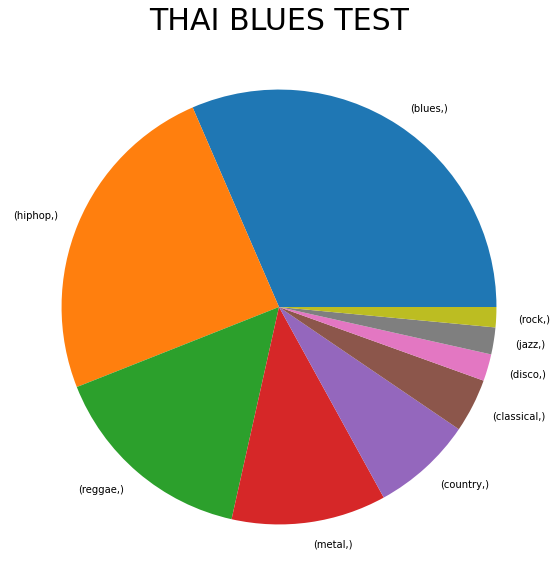

In [80]:
plt.title("THAI BLUES TEST",fontsize = 30)
bluepred.plot.pie(y='mass', figsize=(10, 10))

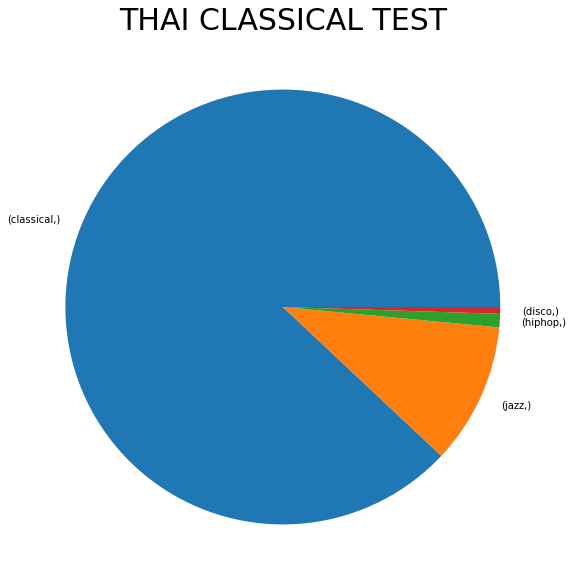

In [77]:
plt.title("THAI CLASSICAL TEST",fontsize = 30)
piest(classicalpred)


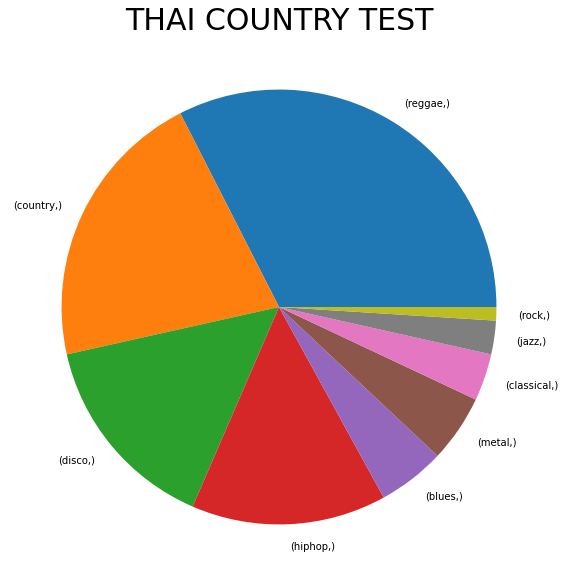

In [70]:
plt.title("THAI COUNTRY TEST",fontsize = 30)
piest(countrypred)

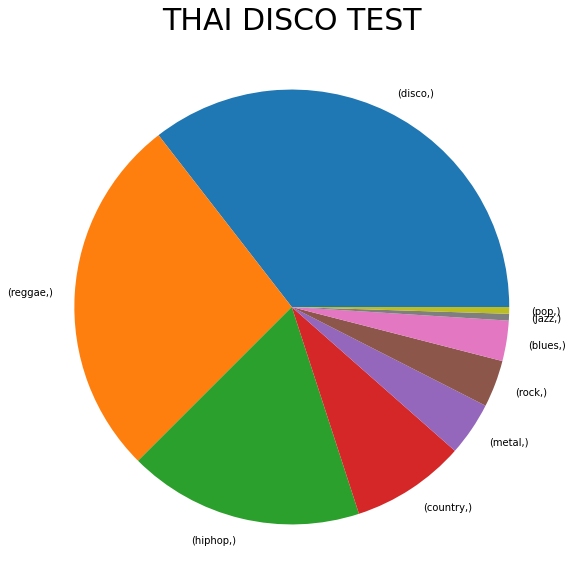

In [81]:
plt.title("THAI DISCO TEST",fontsize = 30)
piest(discopred)

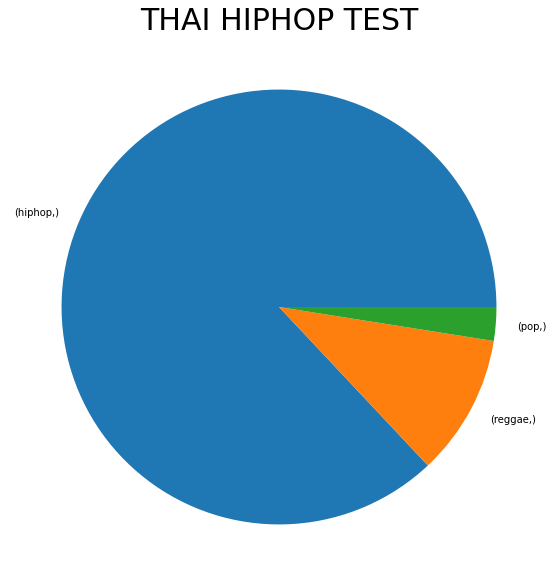

In [82]:
plt.title("THAI HIPHOP TEST",fontsize = 30)
piest(hiphoppred)

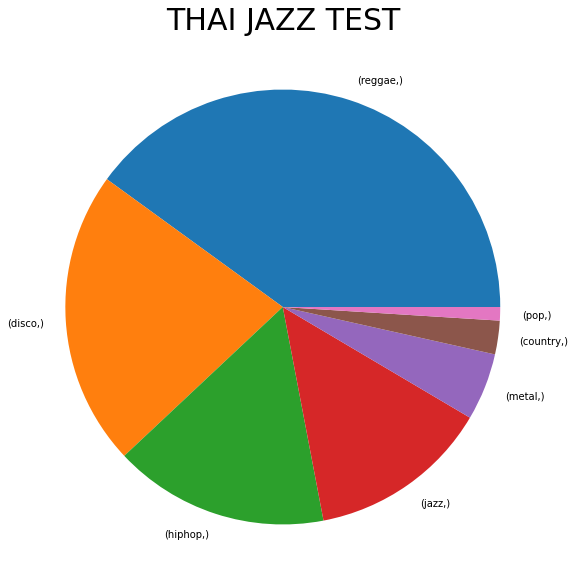

In [83]:
plt.title("THAI JAZZ TEST",fontsize = 30)
piest(jazzpred)

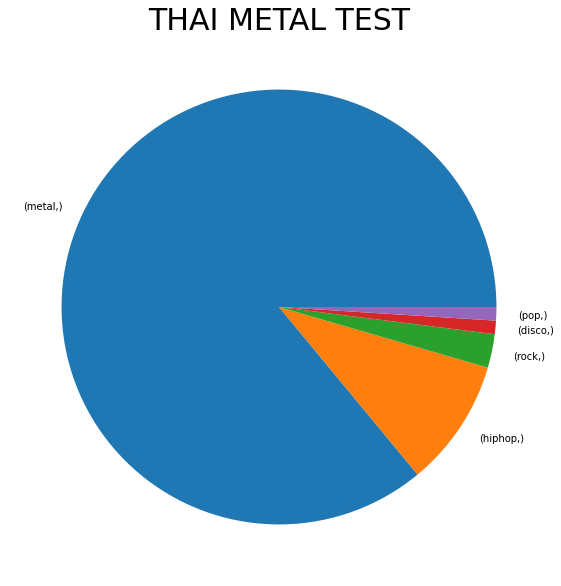

In [86]:
plt.title("THAI METAL TEST",fontsize = 30)
piest(metalpred)

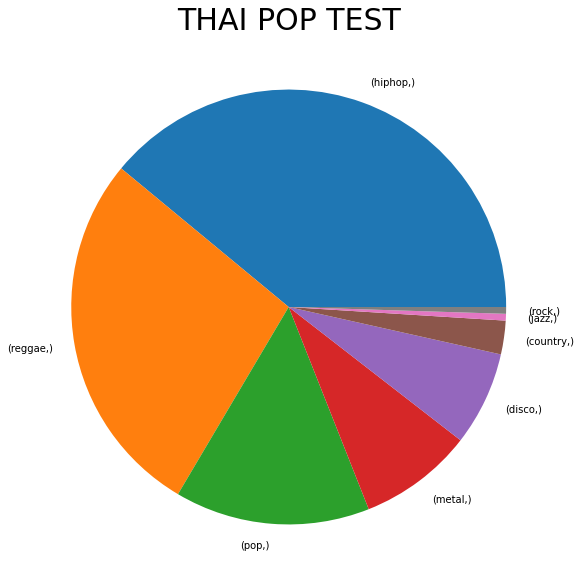

In [87]:
plt.title("THAI POP TEST",fontsize = 30)
piest(poppred)

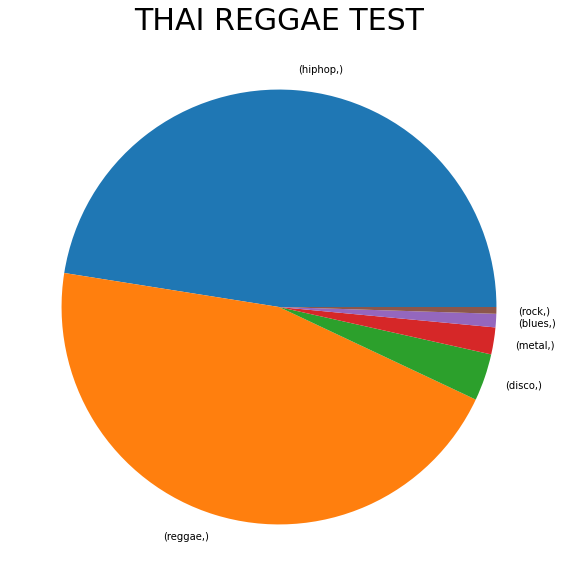

In [90]:
plt.title("THAI REGGAE TEST",fontsize = 30)
piest(reggarepred)

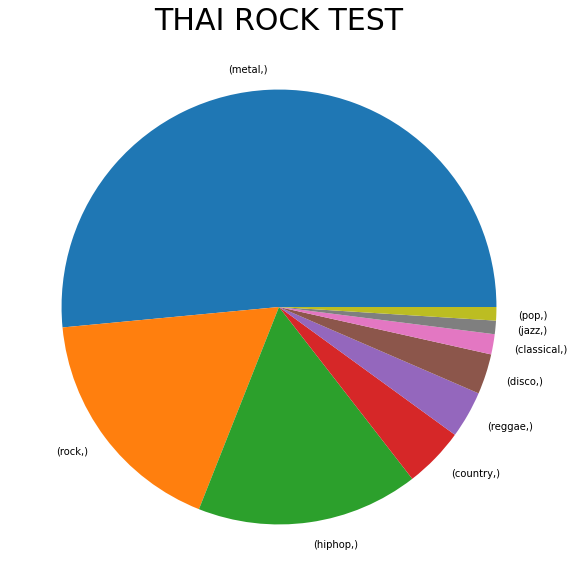

In [91]:
plt.title("THAI ROCK TEST",fontsize = 30)
piest(rockpred)